1. Lectura de datos
-------------------
- Carga el archivo pokemon_primera_gen.csv en un DataFrame de Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pokedex = pd.read_csv("pokemon_primera_gen.csv")

print(pokedex)

         Nombre    Tipo 1   Tipo 2  Ataque  Defensa  Velocidad   PS
0     Bulbasaur    Planta   Veneno      49       49         45   45
1       Ivysaur    Planta   Veneno      62       63         60   60
2      Venusaur    Planta   Veneno      82       83         80   80
3    Charmander     Fuego      NaN      52       43         65   39
4    Charmeleon     Fuego      NaN      64       58         80   58
..          ...       ...      ...     ...      ...        ...  ...
146     Dratini    Dragón      NaN      64       45         50   41
147   Dragonair    Dragón      NaN      84       65         70   61
148   Dragonite    Dragón  Volador     134       95         80   91
149      Mewtwo  Psiquico      NaN     110       90        130  106
150         Mew  Psiquico      NaN     100      100        100  100

[151 rows x 7 columns]


2. Filtrado y selección
-----------------------
- Filtra todos los Pokémon de tipo "Fuego".
- Selecciona solo las columnas Nombre, Tipo 1, Ataque y Velocidad.

In [2]:
tipo_fuego = pokedex[pokedex["Tipo 1"] == "Fuego"]

print(tipo_fuego[["Nombre","Tipo 1","Ataque","Velocidad"]])

         Nombre Tipo 1  Ataque  Velocidad
3    Charmander  Fuego      52         65
4    Charmeleon  Fuego      64         80
5     Charizard  Fuego      84        100
36       Vulpix  Fuego      41         65
37    Ninetales  Fuego      76        100
57    Growlithe  Fuego      70         60
58     Arcanine  Fuego     110         95
76       Ponyta  Fuego      85         90
77     Rapidash  Fuego     100        105
125      Magmar  Fuego      95         93
135     Flareon  Fuego     130         65
145     Moltres  Fuego     100         90


3. Estadística descriptiva básica
---------------------------------
- Calcula el promedio, la mediana y la moda del ataque de todos los Pokémon.
- ¿Cuál es el Pokémon con mayor defensa? ¿Y el de menor velocidad?
- ¿Cuántos Pokémon tienen dos tipos?
- Calcula el rango y la desviación estándar de los PS (Puntos de Salud).

In [3]:
promedio = round(np.mean(pokedex["Ataque"]),1)
mediana = round(np.median(pokedex["Ataque"]),1)
moda_ataque = round(pokedex["Ataque"].mode()[0],1)
max_defensa = round(np.max(pokedex["Defensa"]),1)
min_velocidad = round(np.min(pokedex["Velocidad"]),1)
dos_tipos = pokedex["Tipo 2"].notna() & (pokedex["Tipo 2"] != "")
dos_tipos_cantidad = dos_tipos.sum()
rango_ataque = np.max(pokedex["PS"]) - np.min(pokedex["PS"])
desviacion = round(pokedex["PS"].std(),1)

print(f"Promedio de Ataque: {promedio}")
print(f"Mediana de Ataque: {mediana}")
print(f"Moda de Ataque: {moda_ataque}")
print(f"Máxima Defensa: {max_defensa}")
print(f"Mínima Velocidad: {min_velocidad}")
print(f"Cantidad de Pokémon con dos tipos: {dos_tipos_cantidad}")
print(f"Rango de PS: {rango_ataque}")
print(f"Desviación estándar de PS: {desviacion}")


Promedio de Ataque: 72.4
Mediana de Ataque: 70.0
Moda de Ataque: 65
Máxima Defensa: 180
Mínima Velocidad: 15
Cantidad de Pokémon con dos tipos: 67
Rango de PS: 240
Desviación estándar de PS: 28.6


4. Visualización de datos
-------------------------
- Haz un histograma de los valores de ataque.
- Realiza un gráfico de dispersión entre ataque y velocidad.
- Haz un boxplot de los PS por tipo principal (Tipo 1).
- Grafica la distribución de la defensa usando un diagrama de violín.

Histograma de Ataque


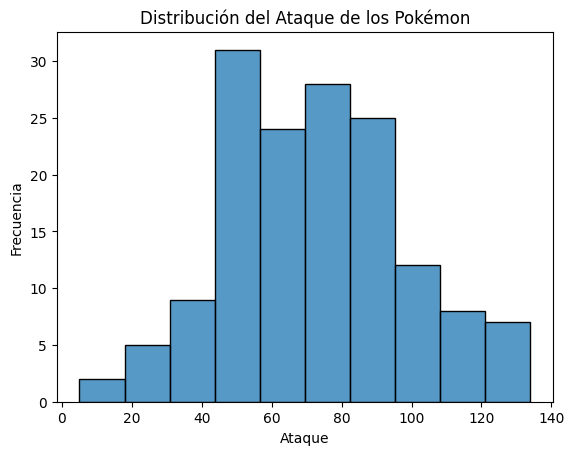

Gráfico de dispersión Ataque vs Velocidad


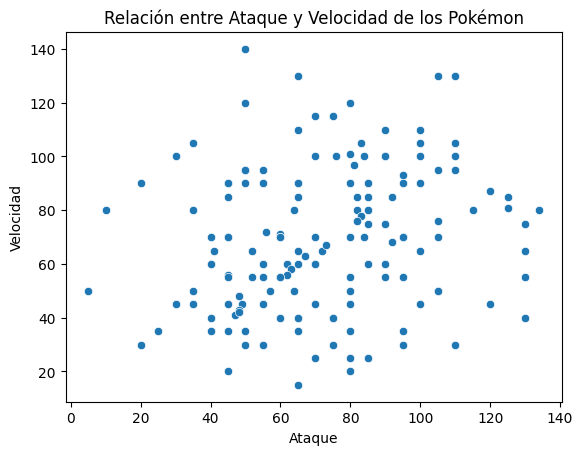

Boxplot de PS por Tipo 1


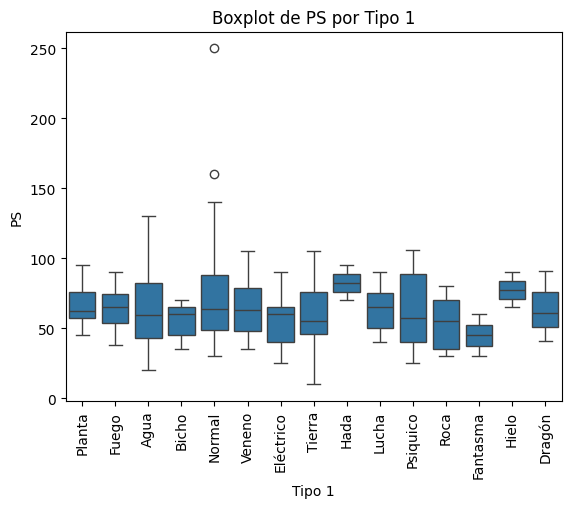

Diagrama de violín de Defensa por Tipo 1


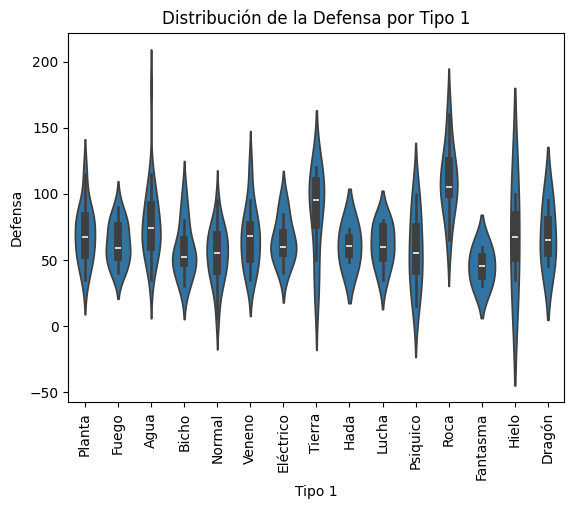

In [17]:
# Histograma de Ataque
print("Histograma de Ataque")
sns.histplot(pokedex["Ataque"], bins=10, edgecolor='black')
plt.xlabel("Ataque")
plt.ylabel("Frecuencia")
plt.title("Distribución del Ataque de los Pokémon")
plt.show()

# Gráfico de dispersión Ataque vs Velocidad
print("Gráfico de dispersión Ataque vs Velocidad")
sns.scatterplot(x=pokedex["Ataque"], y=pokedex["Velocidad"])
plt.xlabel("Ataque")
plt.ylabel("Velocidad")
plt.title("Relación entre Ataque y Velocidad de los Pokémon")
plt.show()

# Boxplot de PS por Tipo 1
print("Boxplot de PS por Tipo 1")
sns.boxplot(x="Tipo 1", y="PS", data=pokedex)
plt.ylabel("PS")
plt.title("Boxplot de PS por Tipo 1")
plt.xticks(rotation=90)
plt.show()

# Diagrama de violín de Defensa por Tipo 1
print("Diagrama de violín de Defensa por Tipo 1")
sns.violinplot(x="Tipo 1", y="Defensa", data=pokedex)
plt.xticks(rotation=90)
plt.ylabel("Defensa")
plt.title("Distribución de la Defensa por Tipo 1")
plt.show()

5. Manipulación de datos
------------------------
- Crea una nueva columna llamada "Poder Total" que sea la suma de ataque, defensa, velocidad y PS.
- Ordena el DataFrame por "Poder Total" de mayor a menor.

In [16]:
pokedex["Poder Total"] = pokedex["Ataque"] + pokedex["Defensa"] + pokedex["Velocidad"] + pokedex["PS"]
print("Pokémon ordenados por Poder Total:")
print(pokedex[["Nombre", "Poder Total"]].sort_values(by="Poder Total", ascending=False))

Pokémon ordenados por Poder Total:
        Nombre  Poder Total
149     Mewtwo          436
148  Dragonite          400
150        Mew          400
90    Cloyster          395
111     Rhydon          395
..         ...          ...
13      Kakuna          155
10     Metapod          155
9     Caterpie          155
12      Weedle          155
62        Abra          150

[151 rows x 2 columns]


6. Agrupamiento y análisis por grupo
-------------------------------------
- Calcula el promedio, la mediana y la desviación estándar de ataque por cada tipo principal (Tipo 1).
- ¿Qué tipo tiene el mayor promedio de velocidad?
- Para cada tipo principal, ¿cuál es el Pokémon con mayor y menor PS?

In [22]:
print("Estadísticas de Ataque por Tipo 1:")
estadisticas_ataque = pokedex.groupby("Tipo 1")["Ataque"].agg(["mean", "median", "std"]).round(1)
print(estadisticas_ataque)

print("\nTipo con mayor promedio de Velocidad:")
promedio_velocidad = pokedex.groupby("Tipo 1")["Velocidad"].agg(["mean"]).round(1)
tipo_max_velocidad = promedio_velocidad[promedio_velocidad["mean"] == promedio_velocidad["mean"].max()]
print(tipo_max_velocidad)

mayor_ps = pokedex[pokedex["PS"] == pokedex["PS"].max()]
print("\nPokémon con mayor PS:")
print(mayor_ps[["Nombre", "PS"]])

menor_ps = pokedex[pokedex["PS"] == pokedex["PS"].min()]
print("\nPokémon con menor PS:")
print(menor_ps[["Nombre", "PS"]])

Estadísticas de Ataque por Tipo 1:
            mean  median   std
Tipo 1                        
Agua        70.2    66.0  26.0
Bicho       63.8    60.0  34.9
Dragón      94.0    84.0  36.1
Eléctrico   62.0    60.0  22.3
Fantasma    50.0    50.0  15.0
Fuego       83.9    84.5  25.2
Hada        57.5    57.5  17.7
Hielo       67.5    67.5  24.7
Lucha      102.9   105.0  18.7
Normal      67.7    62.5  24.9
Planta      70.7    70.0  20.4
Psiquico    60.1    49.0  31.5
Roca        82.2    80.0  29.3
Tierra      81.9    80.0  25.2
Veneno      73.0    76.0  17.7

Tipo con mayor promedio de Velocidad:
           mean
Tipo 1         
Eléctrico  98.9

Pokémon con mayor PS:
      Nombre   PS
112  Chansey  250

Pokémon con menor PS:
     Nombre  PS
49  Diglett  10


7. Análisis exploratorio (EDA)
------------------------------
- ¿Existen tipos de Pokémon que tienden a tener mayor ataque o defensa? Justifica con estadísticas.
- ¿Hay correlación entre ataque y velocidad? Calcula el coeficiente de correlación.
- ¿Qué tan dispersos están los PS dentro de cada tipo? (compara la desviación estándar de PS por tipo)
- Identifica posibles outliers en los valores de ataque y PS usando boxplots.